In [1]:
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from tqdm import tqdm

# Creating distance array


<img src="./tsp-nodes.jpg"/>

We Create a markup table with all distances. <br/>
Since We have only bottom part
<img src="./unknown.png"/>
We need to add a mirror copy like above

In [187]:
import sys

fileName = sys.argv[1] or 'berlin52'
folder = 'data/'

In [99]:

f = open(folder+fileName + '.txt','r')
string = ""
arrayTSP = []
index = int(f.readline())
for i in range(index):
    line = f.readline()
    row = line.split(' ')[:-1]
    arrayTSP.append(row)
    
    for ii, val in enumerate(row):
        if(val is not '0'):
            arrayTSP[ii].append(val)

    string += line

print(len(arrayTSP))
f.close()

52


# Creating City Array

In [62]:
class City:
    def __init__(self, index, x, y):
        self.x = float(x)
        self.y = float(y)
        self.index = int(index)-1
    


In [181]:
string = ""
citiesPop = []
with open(folder+fileName + '.tsp', 'r') as f:
    lines = f.readlines()[6:-1]
    for i in range(index):
        if(i < len(lines)):
            line = lines[i]
            strippedArr = line.strip().split(' ')
            row =  [x for x in strippedArr if x]
            if(len(row) > 1):
                citiesPop.append(City(float(row[0]), float(row[1]), row[2].replace('\n','')))

f.close()

TypeError: Can't convert 'list' object to str implicitly

In [101]:
def calculateDistance(population, cities):
    distance = 0
    for i, val in enumerate(population):
        if(i != len(population)-1):
            currentCityIndex = population[i].index
            nextCityIndex = population[i+1].index
            distance += float(cities[currentCityIndex][nextCityIndex])
    return distance

print(calculateDistance(citiesPop, arrayTSP))

20985.0


In [136]:

# Generate population
class OrderOfPopulation():
    sum = 0
    def __init__(self, population, cities):
        self.cities = cities
        self.population = population
        distance = self.calculateDistance(population)
        self.distance = distance
        self.fitness = self.calculateFitness(distance)
        
    def calculateFitness(self, distance):
        #our score is distance which less means better thats why we divide it
        return 1/distance
    
    def calculateDistance(self, population):
        distance = 0
        for i, val in enumerate(population):
            if(i != len(population)-1):
                currentCityIndex = population[i].index
                nextCityIndex = population[i+1].index
                try:
                    distance += float(self.cities[currentCityIndex][nextCityIndex])
                except IndexError:
                    print(population[i].index, population[i+1].index, len(self.cities[currentCityIndex]), self.cities[currentCityIndex])
#                 if(len(self.cities) < currentCityIndex and len(self.cities[currentCityIndex]) < nextCityIndex):
#                     distance += float(self.cities[currentCityIndex][nextCityIndex])
        
        return distance
    
    def setProb(self, sum):
        self.prob = self.fitness / sum

    def setDistance(self, distance):
        self.distance = distance
    


# Creating 1st population

In [175]:
def getPopulation(cities, iteration):
    population = []
    for i in range(iteration):
        np.random.shuffle(cities)
        p = OrderOfPopulation(cities, arrayTSP)
        
        population.append(p)
    return population;

# we set how many random city configuration will be in the population
numberOfPopulation = 5
cityPopulation = getPopulation(citiesPop, numberOfPopulation)
# set probability (normalize fitness score)
# so we have values in between 0-1 
sum = 0
for i, val in enumerate(cityPopulation):
    sum = sum + val.fitness
print(sum)

sumProb = 0
for i, val in enumerate(cityPopulation):
    val.setProb(sum)
    sumProb = sumProb + val.prob
    
print(sumProb)

0.00017398988791432861
1.0


# Finding the best Individual in the population after 1st population

In [176]:
bestPopulation = None
bestDistance = 0

def getBestFitnessScore(population):
    global bestDistance
    global bestPopulation

    for i, val in enumerate(population):
        if(bestPopulation == None or bestDistance > population[i].distance):
            bestDistance = population[i].distance
            bestPopulation = population[i]
    
    return bestPopulation
    

bestPopulation = getBestFitnessScore(cityPopulation)

print(bestPopulation.distance)

26067.0


In [10]:
# picks number randomly  but with different probability for each element
def pickOne(list, prob):
    index = 0
    r = random.uniform(0, 1)
    while(r > 0.99):
        r = r - prob
        index+=1
    index-=1
    return list[index]

In [11]:
def swap(list, indexA, indexB):
    tempA = list[indexA]
    list[indexA] = list[indexB]
    list[indexB] = tempA

In [157]:
mutationRate = 0.015
def mutate(order):
    indexA = math.floor(np.random.uniform(0, len(order)))
    indexB = math.floor(np.random.uniform(0, len(order)))
    if(np.random.uniform(0,1) < mutationRate):
        swap(order, indexA, indexB)

arr = [1,2,3,4,5,6,7,8,9,10]
arr2 = [8,2,10,4,5,9,7,3,6,1]
mutate(arr)
print(arr)
# print(crossover(arr, arr2))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


# Crossover

##### Typical crossover looks like this
We take half of <b>parentA</b> and 2nd half of <b>parentB</b>, and We combine them

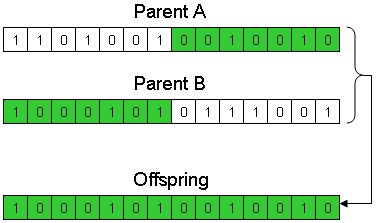

In [13]:
Image(filename='crossover2.jpg')

 Our crossover takes half of <b>parentA</b> and fills rest of the offspring with <b>parentB</b> that didn't occured in array. <br>
 We do it because every element is unique so We can't have duplicates


In [14]:
from random import shuffle
def crossover(orderA, orderB):
    indexOfHalf = math.floor(len(orderA)/2)
    partOfA = orderA[0:indexOfHalf]
    partOfB = []
    for i in orderB:
        if i not in partOfA:
            partOfB.append(i)
#     x = [[i] for i in range(10)]
#     shuffle(partOfA)
    return partOfA + partOfB

In [182]:
def getFittest(population):
    # sorts the list based on the routes' lengths
    sorted_list = sorted(population, key=lambda x: x.fitness, reverse=True)
    return sorted_list[:2]

In [174]:
def newGeneration(orders):
    global arrayTSP
    global sum
    newOrders = []
    for i, citiesOrder in enumerate(orders):
#         orderA = pickOne(orders, citiesOrder.prob)
#         orderB = pickOne(orders, citiesOrder.prob)
        
        orderA = random.choice(orders)
        orderB = random.choice(orders)
#         bestFit = getFittest(orders)
#         orderA = bestFit[0]
#         orderB = bestFit[1]

        mixedOrder = crossover(orderA.population, orderB.population)
    
        mutate(mixedOrder)
        mutate(mixedOrder)
        p = OrderOfPopulation(mixedOrder, arrayTSP)
        p.setProb(sum)
        newOrders.append(p)
    return newOrders

# Create new generation 

In [177]:
numberOfGenerations = 100
length = len(arrayTSP)
if(length < 800):
    numberOfGenerations = 3000
if(length < 100):
    numberOfGenerations = 500000
#20 3000000
scoreTest = 99999999999
for i in tqdm(range(numberOfGenerations)):
    cityPopulation = newGeneration(cityPopulation)
    bestPopulation = getBestFitnessScore(cityPopulation)
    cityPopulation = cityPopulation[1:]
    cityPopulation.insert(0, bestPopulation)
    if(scoreTest > bestPopulation.distance):
        scoreTest = bestPopulation.distance
        print(scoreTest)
    


  0%|          | 0/500000 [00:00<?, ?it/s]

26067.0



  6%|▌         | 29206/500000 [00:11<02:55, 2687.22it/s]

26065.0
25940.0
25452.0
25189.0
25045.0
24680.0
24027.0
24008.0
23308.0


  6%|▌         | 29475/500000 [00:11<03:08, 2494.82it/s]

22409.0
22272.0
22085.0
21955.0


  6%|▌         | 29728/500000 [00:11<03:26, 2282.52it/s]

21210.0
21077.0
20992.0
20179.0


  6%|▌         | 29962/500000 [00:11<03:28, 2254.38it/s]

19362.0
19093.0
18522.0


  6%|▌         | 30193/500000 [00:11<03:27, 2269.01it/s]

18258.0


  6%|▌         | 30434/500000 [00:11<03:23, 2304.37it/s]

18148.0
18050.0
17859.0
17491.0
17439.0


  6%|▌         | 30667/500000 [00:11<03:28, 2253.00it/s]

17374.0
17304.0


  6%|▌         | 30902/500000 [00:11<03:25, 2278.68it/s]

17258.0
17222.0


  6%|▋         | 31675/500000 [00:12<03:08, 2480.77it/s]

17202.0
17198.0


  6%|▋         | 31926/500000 [00:12<03:08, 2483.68it/s]

17166.0
17138.0
16965.0
16951.0


  6%|▋         | 32176/500000 [00:12<03:12, 2428.67it/s]

16803.0
16775.0
16680.0
16587.0
16141.0


  6%|▋         | 32421/500000 [00:12<03:26, 2267.17it/s]

16075.0
16070.0


  7%|▋         | 32656/500000 [00:12<03:24, 2289.48it/s]

16031.0


  7%|▋         | 32888/500000 [00:12<03:28, 2243.06it/s]

15982.0
15933.0


  7%|▋         | 33115/500000 [00:12<03:29, 2226.44it/s]

15931.0
15914.0


  7%|▋         | 33339/500000 [00:12<03:40, 2120.66it/s]

15873.0


  7%|▋         | 33847/500000 [00:13<03:21, 2315.14it/s]

15797.0
15731.0
15698.0


  7%|▋         | 34093/500000 [00:13<03:18, 2351.58it/s]

15664.0
15572.0
15516.0
15511.0


  7%|▋         | 34579/500000 [00:13<03:18, 2349.15it/s]

15488.0
15380.0
15314.0


  7%|▋         | 34816/500000 [00:13<03:18, 2339.91it/s]

14988.0
14958.0


  7%|▋         | 35077/500000 [00:13<03:12, 2414.87it/s]

14522.0


  7%|▋         | 35346/500000 [00:13<03:06, 2490.25it/s]

14477.0


  7%|▋         | 35613/500000 [00:13<03:02, 2539.88it/s]

14150.0
13926.0
13887.0


  7%|▋         | 35869/500000 [00:13<03:04, 2513.79it/s]

13853.0
13845.0


  7%|▋         | 36892/500000 [00:14<03:02, 2538.25it/s]

13346.0
13281.0


  7%|▋         | 37147/500000 [00:14<03:03, 2521.63it/s]

13234.0


  8%|▊         | 38725/500000 [00:15<03:09, 2433.47it/s]

13230.0


  8%|▊         | 38981/500000 [00:15<03:06, 2468.42it/s]

13016.0


  8%|▊         | 39229/500000 [00:15<03:11, 2405.07it/s]

12743.0


  8%|▊         | 40314/500000 [00:15<02:54, 2633.75it/s]

12728.0


  8%|▊         | 40849/500000 [00:15<02:53, 2653.12it/s]

12703.0
12590.0


  9%|▊         | 42735/500000 [00:16<02:52, 2652.55it/s]

12491.0


  9%|▊         | 43003/500000 [00:16<02:51, 2658.50it/s]

12329.0
12286.0


  9%|▊         | 43536/500000 [00:16<02:53, 2628.38it/s]

12103.0


  9%|▉         | 44348/500000 [00:17<02:51, 2657.53it/s]

12100.0
12074.0


  9%|▉         | 44615/500000 [00:17<02:54, 2616.02it/s]

12068.0
12040.0


  9%|▉         | 45142/500000 [00:17<02:55, 2593.35it/s]

11986.0
11979.0


  9%|▉         | 45402/500000 [00:17<02:57, 2555.13it/s]

11893.0


  9%|▉         | 45946/500000 [00:17<02:52, 2638.23it/s]

11886.0


  9%|▉         | 47019/500000 [00:18<02:49, 2671.92it/s]

11760.0
11719.0
11707.0


  9%|▉         | 47287/500000 [00:18<02:54, 2590.63it/s]

11592.0


 10%|▉         | 47547/500000 [00:18<02:55, 2575.69it/s]

11581.0
11569.0


 10%|▉         | 47807/500000 [00:18<02:55, 2580.65it/s]

11414.0


 10%|▉         | 48613/500000 [00:18<02:50, 2654.04it/s]

11227.0


 10%|▉         | 49155/500000 [00:19<02:49, 2667.08it/s]

10938.0


 10%|█         | 51038/500000 [00:19<02:49, 2648.08it/s]

10933.0
10904.0


 11%|█         | 52921/500000 [00:20<02:52, 2596.86it/s]

10894.0


 12%|█▏        | 57806/500000 [00:22<02:44, 2692.26it/s]

10209.0


 12%|█▏        | 58076/500000 [00:22<02:51, 2583.92it/s]

10202.0


 12%|█▏        | 58602/500000 [00:22<02:50, 2587.08it/s]

10155.0


 12%|█▏        | 58870/500000 [00:22<02:48, 2612.23it/s]

10115.0


 12%|█▏        | 62085/500000 [00:23<02:45, 2640.93it/s]

10090.0


 13%|█▎        | 65558/500000 [00:25<02:47, 2595.64it/s]

10083.0


 14%|█▍        | 71251/500000 [00:27<02:38, 2699.97it/s]

10056.0


 15%|█▍        | 73167/500000 [00:28<02:37, 2706.75it/s]

9995.0


 15%|█▍        | 73706/500000 [00:28<02:39, 2668.08it/s]

9981.0


 15%|█▌        | 75048/500000 [00:28<02:39, 2656.50it/s]

9936.0


 16%|█▌        | 78305/500000 [00:29<02:34, 2736.48it/s]

9829.0


 16%|█▌        | 80481/500000 [00:30<02:35, 2701.18it/s]

9818.0


 17%|█▋        | 86216/500000 [00:32<02:31, 2730.21it/s]

9757.0


 17%|█▋        | 86490/500000 [00:33<02:31, 2726.45it/s]

9716.0


 17%|█▋        | 86763/500000 [00:33<02:32, 2711.40it/s]

9709.0


 17%|█▋        | 87035/500000 [00:33<02:34, 2680.89it/s]

9672.0


 18%|█▊        | 88662/500000 [00:33<02:32, 2702.90it/s]

9593.0


 18%|█▊        | 92088/500000 [00:35<02:35, 2615.36it/s]

9584.0
9564.0


 19%|█▊        | 93424/500000 [00:35<02:32, 2663.63it/s]

9536.0


 19%|█▊        | 93691/500000 [00:35<02:33, 2643.62it/s]

9531.0


 19%|█▉        | 93956/500000 [00:35<02:35, 2619.61it/s]

9525.0


 19%|█▉        | 95748/500000 [00:36<02:41, 2499.12it/s]

9518.0


 20%|█▉        | 99246/500000 [00:37<02:30, 2666.28it/s]

9436.0


 20%|██        | 100056/500000 [00:38<02:30, 2660.99it/s]

9333.0


 22%|██▏       | 107713/500000 [00:41<02:24, 2721.66it/s]

9274.0


 22%|██▏       | 108261/500000 [00:41<02:24, 2704.39it/s]

9244.0


 22%|██▏       | 112225/500000 [00:42<02:37, 2460.82it/s]

9239.0


 25%|██▍       | 124402/500000 [00:47<02:20, 2674.26it/s]

9129.0


 25%|██▌       | 125460/500000 [00:47<02:26, 2549.71it/s]

9094.0


 26%|██▌       | 130285/500000 [00:49<02:27, 2510.88it/s]

9089.0


 26%|██▌       | 131048/500000 [00:50<02:34, 2385.89it/s]

9055.0


 26%|██▋       | 131317/500000 [00:50<02:29, 2468.06it/s]

9000.0


 29%|██▉       | 145090/500000 [00:55<02:15, 2611.92it/s]

8997.0


 32%|███▏      | 158508/500000 [01:00<02:06, 2690.77it/s]

8996.0
8973.0


100%|██████████| 500000/500000 [03:08<00:00, 2648.51it/s]


# Finding the best Individual in the population after creating new Generation

In [178]:
bestPopulation = getBestFitnessScore(cityPopulation)
print('Best distance - ', bestPopulation.distance)

8973.0


# Visualizing best path

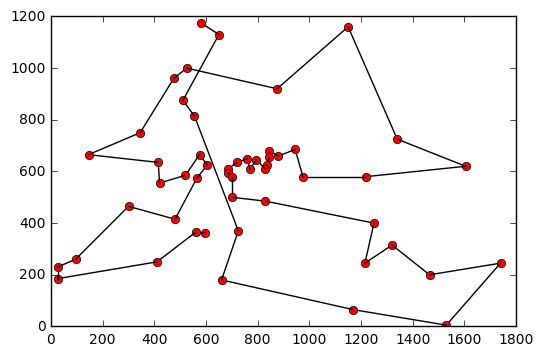

saved to wynik_-f


In [188]:
import matplotlib.pyplot as plt

# display all cities
def displayBestPopulation():
    order = []
    for i, city in enumerate(bestPopulation.population):
        plt.plot(city.x, city.y, 'ro-')
        if (i+1) <= (len(bestPopulation.population)-1):
            nextCity = bestPopulation.population[i+1];
            order.append(city.index)
            plt.plot([city.x, nextCity.x],[city.y,nextCity.y],'k-')

    plt.show()
    order = np.array(order)
    np.savetxt("wynik_"+ fileName +".txt", order, fmt="%d")
    print('Saved to wynik_'+fileName)

displayBestPopulation()